<a href="https://colab.research.google.com/github/yazeedmshayekh2/ShAi_Training/blob/main/task_7_exercises_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as stat
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
fileDownloaded = drive.CreateFile({'id':'1OOMQLkA5z4BQv993b5zcYyypxnwBoRkK'})
fileDownloaded.GetContentFile('advertising.csv')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [5]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [6]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
ad_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
count_of_zeroes = (ad_data.drop(columns=['Male', 'Clicked on Ad']) == 0).sum()
count_of_zeroes

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Country                     0
Timestamp                   0
dtype: int64

In [10]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

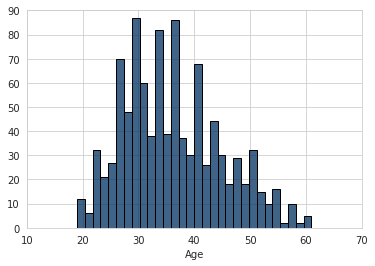

In [11]:
sns.histplot(ad_data['Age'], bins=30, edgecolor="black", color='#003060')
plt.xlim([10,70])
plt.ylim([0,90])
plt.ylabel('');

**Create a jointplot showing Area Income versus Age.**

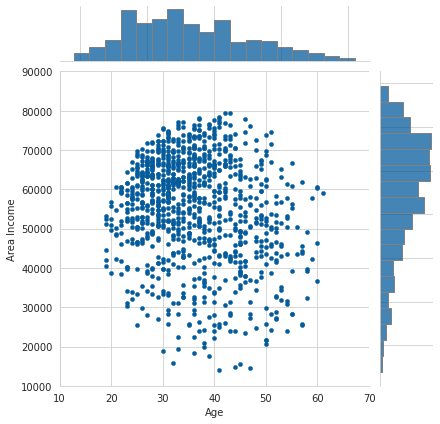

In [12]:
plot_1 = sns.jointplot(data = ad_data, x= ad_data['Age'], y= ad_data['Area Income'], edgecolor=None, color='#055C9D', s=18, marginal_kws=dict(bins=18, edgecolor="gray"))
plot_1.ax_joint.set_yticks(range(10000,90001, 10000));
plot_1.ax_joint.set_xticks(range(10, 71, 10));

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

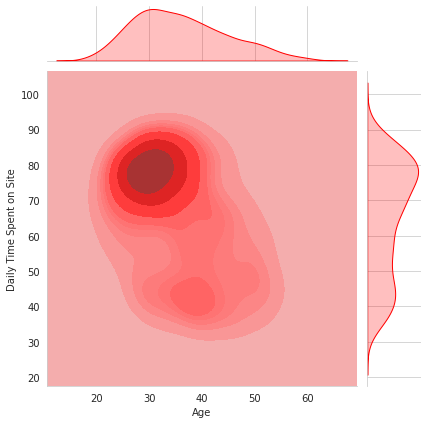

In [13]:
sns.jointplot(x=ad_data['Age'], y=ad_data['Daily Time Spent on Site'], kind='kde', color="red", fill=True, thresh=0)

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


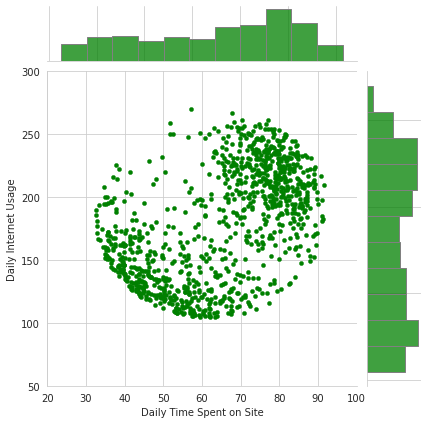

In [14]:
plot_2 = sns.jointplot(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'], edgecolor=None, color='green', s=18, marginal_kws=dict(edgecolor='gray'))
plot_2.ax_joint.set_yticks(range(50, 301, 50))
plot_2.ax_joint.set_xticks(range(20, 101, 10));

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [15]:
cols = list(['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad'])
cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male',
 'Clicked on Ad']

In [16]:
ad_data['Daily Time Spent on Site'].describe()

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64

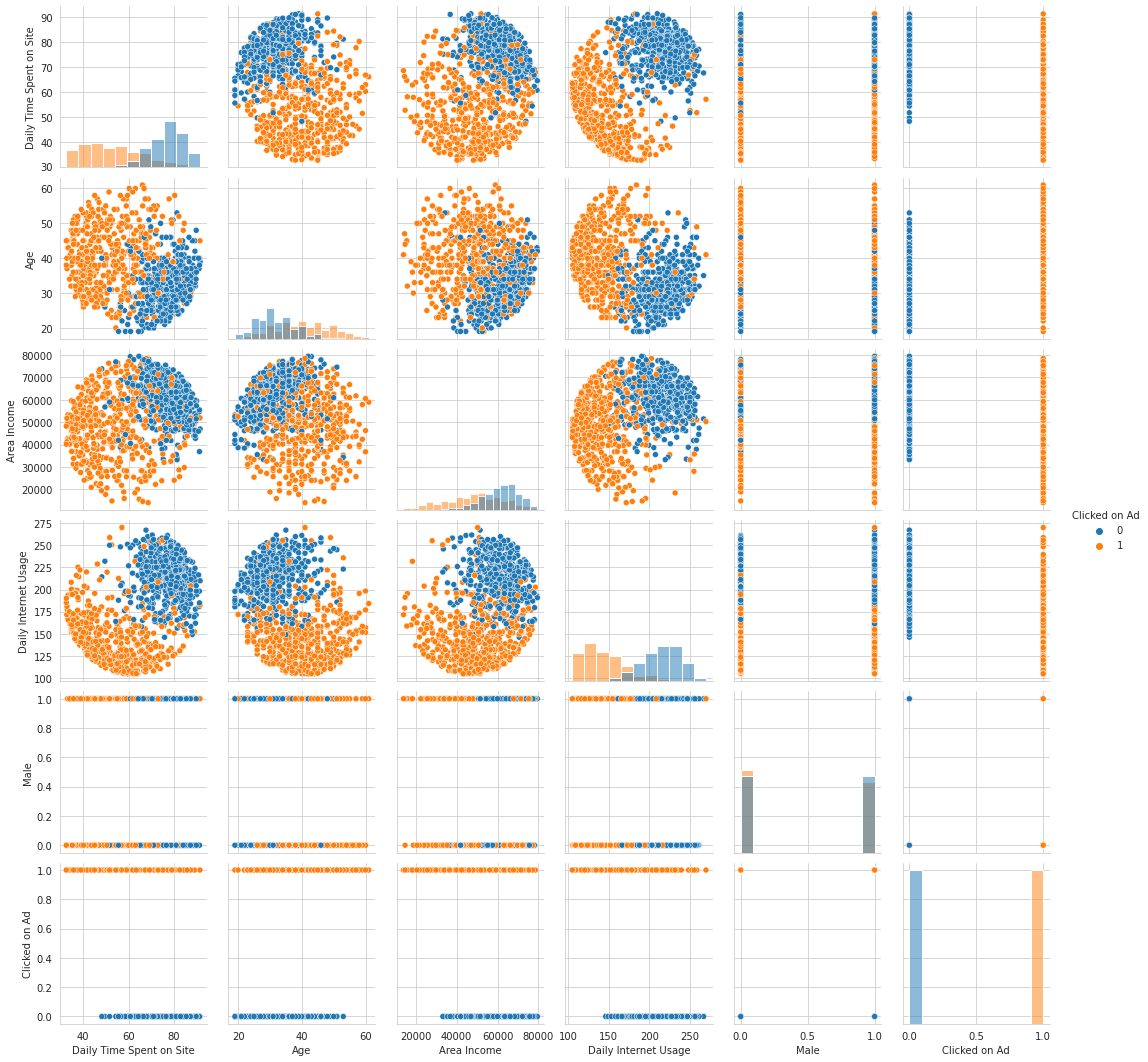

In [17]:
pairplot = sns.pairplot(
                        ad_data,
                        hue='Clicked on Ad',
                        vars= cols,
                        diag_kind= 'hist'
                    )

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [18]:
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [19]:
ad_data['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

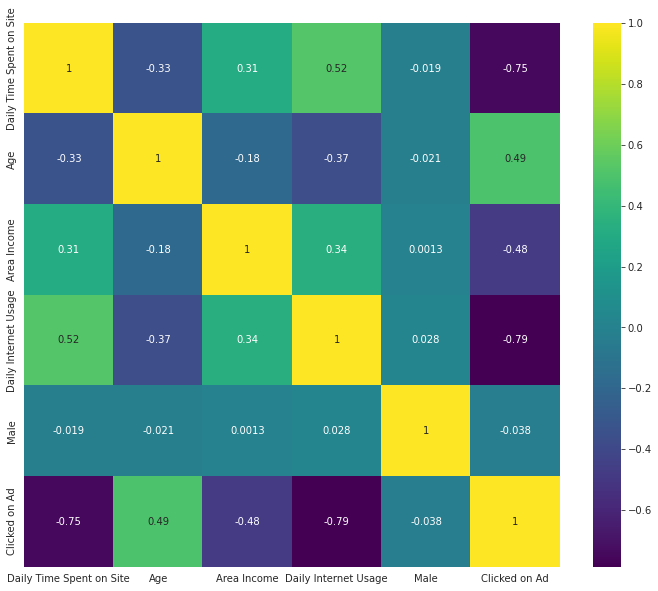

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(ad_data.corr(), cmap='viridis', annot=True)

In [93]:
X = ad_data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = ad_data['Clicked on Ad']

In [94]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
Numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
Numerical_cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male']

feature scaling

In [98]:
Num_Transfromer = make_column_transformer(
        (MinMaxScaler(), Numerical_cols),
        (StandardScaler(), Numerical_cols),
        remainder='passthrough'
    )

X_train = Num_Transfromer.fit_transform(X_train)
X_test = Num_Transfromer.transform(X_test)

In [99]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,0.738059,0.071429,0.491438,0.669606,0.0,0.681519,-1.591714,-0.663929,0.645655,-0.955968
1,0.784634,0.309524,0.855364,0.658103,1.0,0.853777,-0.458721,1.117805,0.604556,1.046060
2,0.695054,0.452381,0.811381,0.889507,0.0,0.522463,0.221075,0.902470,1.431327,-0.955968
3,0.800102,0.214286,0.680726,0.778055,0.0,0.910987,-0.911918,0.262802,1.033125,-0.955968
4,0.282339,0.642857,0.537652,0.067485,0.0,-1.003970,1.127470,-0.437674,-1.505639,-0.955968
...,...,...,...,...,...,...,...,...,...,...
795,0.673636,0.142857,0.497210,0.869057,1.0,0.443249,-1.251816,-0.635673,1.358262,1.046060
796,0.202108,0.809524,0.749808,0.402352,1.0,-1.300707,1.920566,0.601015,-0.309207,1.046060
797,0.998980,0.619048,0.579096,0.495974,1.0,1.646541,1.014171,-0.234770,0.025291,1.046060
798,0.408975,0.547619,0.896159,0.219709,0.0,-0.535604,0.674273,1.317533,-0.961765,-0.955968


In [82]:
def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        model_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        model_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

** Train and fit a logistic regression model on the training set.**

In [83]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

print_score(Log_reg, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 97.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.966667    0.986842   0.97625    0.976754      0.976477
recall       0.987835    0.964010   0.97625    0.975922      0.976250
f1-score     0.977136    0.975293   0.97625    0.976214      0.976240
support    411.000000  389.000000   0.97625  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[406   5]
 [ 14 375]]



logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [134]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
grid = dict(solver=solvers, class_weight=class_weight, penalty=penalty, C=c_values)

In [135]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Log_reg, param_grid=grid, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [136]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.975000 using {'C': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'penalty': 'l2', 'solver': 'liblinear'}


In [137]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.000000 (0.000000) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'lbfgs'}
0.972083 (0.013572) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}
0.972083 (0.013572) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'newton-cg'}
0.972083 (0.013572) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.972083 (0.013572) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'elasticnet', 'solver': 'l

## Predictions and Evaluations
** Now predict values for the testing data.**

** Create a Confusion Matrix for the model.**

In [138]:
print_score(grid_result.best_estimator_, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 96.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.945652    0.981481     0.965    0.963567      0.965537
recall      0.977528    0.954955     0.965    0.966242      0.965000
f1-score    0.961326    0.968037     0.965    0.964681      0.965050
support    89.000000  111.000000     0.965  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[ 87   2]
 [  5 106]]



In [133]:
print_score(Log_reg, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 96.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.945055    0.972477      0.96    0.958766      0.960274
recall      0.966292    0.954955      0.96    0.960624      0.960000
f1-score    0.955556    0.963636      0.96    0.959596      0.960040
support    89.000000  111.000000      0.96  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[ 86   3]
 [  5 106]]



## k-Nearest Neighbors

In [107]:
KNN = KNeighborsClassifier(19)
KNN.fit(X_train, y_train)

print_score(KNN, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 97.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.948956    0.994580      0.97    0.971768      0.971141
recall       0.995134    0.943445      0.97    0.969289      0.970000
f1-score     0.971496    0.968338      0.97    0.969917      0.969961
support    411.000000  389.000000      0.97  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[409   2]
 [ 22 367]]



In [108]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [110]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [111]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.970833 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
0.958750 (0.019672) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.958750 (0.019672) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.967083 (0.014959) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.965000 (0.016583) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.965000 (0.014930) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.966250 (0.014124) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.966250 (0.014843) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.967083 (0.014959) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.970000 (0.015679) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.969583 (0.015372) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.970417 

In [112]:
print_score(KNN, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 94.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.896907    0.980583      0.94    0.938745      0.943347
recall      0.977528    0.909910      0.94    0.943719      0.940000
f1-score    0.935484    0.943925      0.94    0.939705      0.940169
support    89.000000  111.000000      0.94  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[ 87   2]
 [ 10 101]]



In [113]:
print_score(grid_result.best_estimator_, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 92.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.885417    0.961538     0.925    0.923478      0.927664
recall      0.955056    0.900901     0.925    0.927979      0.925000
f1-score    0.918919    0.930233     0.925    0.924576      0.925198
support    89.000000  111.000000     0.925  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[ 85   4]
 [ 11 100]]



##random forest classifier

In [117]:
Random_forest = RandomForestClassifier()

Random_forest.fit(X_train, y_train)
print_score(Random_forest, X_train, y_train, X_test, y_test, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    411.0  389.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[411   0]
 [  0 389]]



In [118]:
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [123]:
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Random_forest, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [124]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.972083 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.965833 (0.017658) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.971250 (0.016186) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.972083 (0.014678) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.963750 (0.019459) with: {'max_features': 'log2', 'n_estimators': 10}
0.971667 (0.016750) with: {'max_features': 'log2', 'n_estimators': 100}
0.970833 (0.015590) with: {'max_features': 'log2', 'n_estimators': 1000}


In [125]:
print_score(Random_forest, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 93.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.922222    0.945455     0.935    0.933838      0.935116
recall      0.932584    0.936937     0.935    0.934761      0.935000
f1-score    0.927374    0.941176     0.935    0.934275      0.935035
support    89.000000  111.000000     0.935  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[ 83   6]
 [  7 104]]



In [126]:
print_score(grid_result.best_estimator_, X_train, y_train, X_test, y_test, train=False)

Test Result:
Accuracy Score: 93.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.912088    0.944954      0.93    0.928521      0.930329
recall      0.932584    0.927928      0.93    0.930256      0.930000
f1-score    0.922222    0.936364      0.93    0.929293      0.930071
support    89.000000  111.000000      0.93  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[ 83   6]
 [  8 103]]



## Great Job!